Epoch 1 - Loss: 2.0275, Accuracy: 0.3780
Epoch 2 - Loss: 1.3363, Accuracy: 0.6920
Epoch 3 - Loss: 0.9123, Accuracy: 0.7950
Epoch 4 - Loss: 0.7050, Accuracy: 0.8070
Epoch 5 - Loss: 0.6076, Accuracy: 0.8380
Epoch 6 - Loss: 0.5256, Accuracy: 0.8640
Epoch 7 - Loss: 0.4798, Accuracy: 0.8650
Epoch 8 - Loss: 0.4391, Accuracy: 0.8770
Epoch 9 - Loss: 0.4569, Accuracy: 0.8730
Epoch 10 - Loss: 0.4145, Accuracy: 0.8820
Epoch 11 - Loss: 0.4145, Accuracy: 0.8800
Epoch 12 - Loss: 0.4053, Accuracy: 0.8780
Epoch 13 - Loss: 0.4122, Accuracy: 0.8820
Epoch 14 - Loss: 0.3467, Accuracy: 0.9160
Epoch 15 - Loss: 0.3319, Accuracy: 0.9060
Epoch 16 - Loss: 0.3185, Accuracy: 0.9040
Epoch 17 - Loss: 0.3293, Accuracy: 0.8950
Epoch 18 - Loss: 0.3770, Accuracy: 0.8960
Epoch 19 - Loss: 0.3306, Accuracy: 0.9070
Epoch 20 - Loss: 0.3228, Accuracy: 0.9190
Epoch 21 - Loss: 0.3461, Accuracy: 0.8930
Epoch 22 - Loss: 0.3002, Accuracy: 0.9070
Epoch 23 - Loss: 0.3048, Accuracy: 0.9060
Epoch 24 - Loss: 0.2966, Accuracy: 0.9130
E

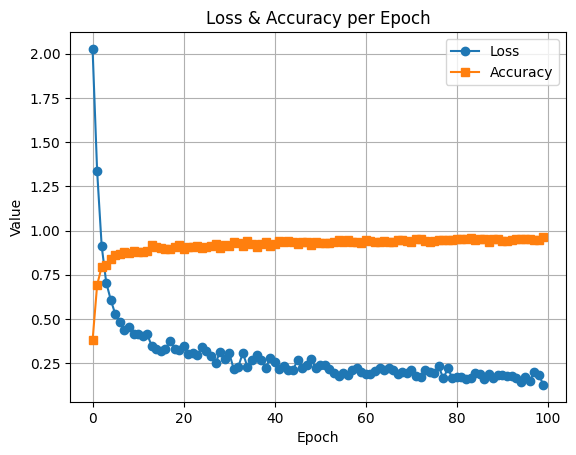

ValueError: num must be an integer with 1 <= num <= 5, not 6

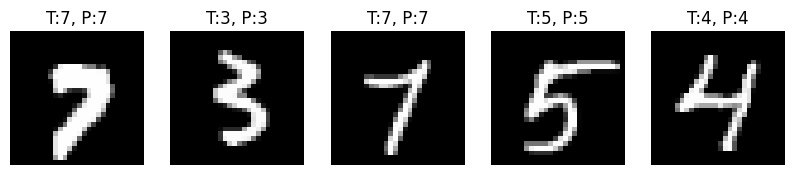

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [ ]:

# --- 데이터 전처리 및 로딩 ---
transform = transforms.Compose([transforms.ToTensor()])
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(mnist_train, batch_size=1, shuffle=True)

# --- DNN 구성요소 ---
def ReLU(x):
    return np.maximum(0, x)

def dReLU(x):
    return (x > 0).astype(float)

def softmax(x):
    e = np.exp(x - np.max(x))
    return e / np.sum(e)

def cross_entropy_loss(pred_probs, true_class_index):
    return -np.log(pred_probs[true_class_index] + 1e-8)

def accuracy(y_true, y_pred):
    return np.mean(np.array(y_true) == np.array(y_pred))


In [ ]:

# --- 모델 파라미터 초기화 ---
input_size = 28 * 28
hidden_size1 = 128
hidden_size2 = 64
output_size = 10

W1 = np.random.randn(hidden_size1, input_size) * np.sqrt(2 / input_size)
b1 = np.zeros(hidden_size1)
W2 = np.random.randn(hidden_size2, hidden_size1) * np.sqrt(2 / hidden_size1)
b2 = np.zeros(hidden_size2)
W3 = np.random.randn(output_size, hidden_size2) * np.sqrt(2 / hidden_size2)
b3 = np.zeros(output_size)

lr = 0.001
loss_list = []
acc_list = []

# --- 훈련 ---
for epoch in range(100):
    total_loss = 0
    true_labels = []
    pred_labels = []

    for i, (img, label) in enumerate(train_loader):
        if i >= 1000:
            break
        x = img.view(-1).numpy()
        y_true = label.item()

        # --- Forward ---
        z1 = np.dot(W1, x) + b1
        a1 = ReLU(z1)
        z2 = np.dot(W2, a1) + b2
        a2 = ReLU(z2)
        z3 = np.dot(W3, a2) + b3
        y_pred = softmax(z3)

        # --- Loss ---
        loss = cross_entropy_loss(y_pred, y_true)
        total_loss += loss
        pred_labels.append(np.argmax(y_pred))
        true_labels.append(y_true)

        # --- Backward ---
        onehot = np.zeros(output_size)
        onehot[y_true] = 1
        dz3 = y_pred - onehot
        dW3 = np.outer(dz3, a2)
        db3 = dz3

        dz2 = np.dot(W3.T, dz3) * dReLU(z2)
        dW2 = np.outer(dz2, a1)
        db2 = dz2

        dz1 = np.dot(W2.T, dz2) * dReLU(z1)
        dW1 = np.outer(dz1, x)
        db1 = dz1

        W3 -= lr * dW3
        b3 -= lr * db3
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1

    avg_loss = total_loss / 1000
    acc = accuracy(true_labels, pred_labels)
    loss_list.append(avg_loss)
    acc_list.append(acc)
    print(f"Epoch {epoch+1} - Loss: {avg_loss:.4f}, Accuracy: {acc:.4f}")


In [ ]:

# --- Loss/Accuracy 시각화 ---
plt.plot(loss_list, label='Loss', marker='o')
plt.plot(acc_list, label='Accuracy', marker='s')
plt.title("Loss & Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# --- 예측 결과 확인 ---
import matplotlib.pyplot as plt
samples = []
for i, (img, label) in enumerate(train_loader):
    if i >= 10:
        break
    x = img.view(-1).numpy() * 255
    y_true = label.item()

    z1 = np.dot(W1, x) + b1
    a1 = ReLU(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = ReLU(z2)
    z3 = np.dot(W3, a2) + b3
    y_pred = softmax(z3)
    y_out = np.argmax(y_pred)
    samples.append((img.squeeze().numpy(), y_true, y_out))

plt.figure(figsize=(10, 3))
for i, (img, true_cls, pred_cls) in enumerate(samples):
    plt.subplot(1, len(samples), i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"T:{true_cls}, P:{pred_cls}")
    plt.axis('off')
plt.suptitle("Test Samples - True vs Predicted (DNN)")
plt.tight_layout()
plt.show()
